In [ ]:
import os, json, torch
import numpy as np
import torchvision.transforms as transforms
from torchvision import datasets
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
data_directory = '/content/drive/MyDrive/Colab/Project/'

train_directory = os.path.join(data_directory, 'training/')
val_directory = os.path.join(data_directory, 'validation/')
test_directory = os.path.join(data_directory, 'testing/')

In [17]:
convert_tensor = transforms.ToTensor()
batch_size  = 64
num_workers = 2

def get_dataloader(lookup_file_name, data_directory, sub_directory):
  file = open(data_directory + lookup_file_name + '.json')
  lookup = json.load(file)
  data = []

  for file in os.listdir(data_directory + sub_directory + '/'):
    poster_image = Image.open(data_directory + sub_directory + '/' + file)
    poster_tensor = convert_tensor(poster_image)
    poster_num = file[:-4]
    poster_genres = lookup[str(poster_num)]
    data.append([poster_tensor, poster_genres])

  dataloader = torch.utils.data.DataLoader(data, batch_size=batch_size, num_workers=num_workers, shuffle=True, drop_last=True)

  return dataloader

In [18]:
validation_loader = get_dataloader('validation_lookup', data_directory, 'validation')
testing_loader = get_dataloader('testing_lookup', data_directory, 'testing')
training_loader = get_dataloader('training_lookup', data_directory, 'testing')

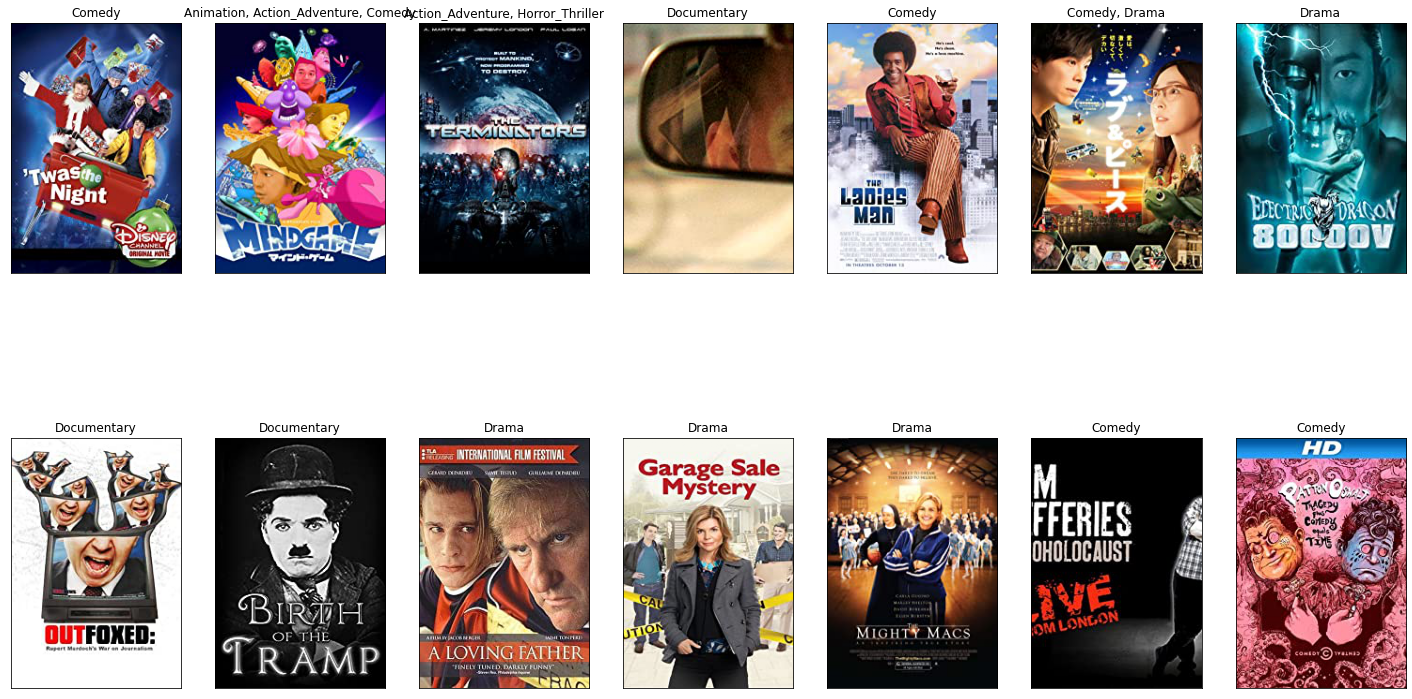

In [57]:
# Visualize some sample data

# obtain one batch of training images
dataiter = iter(validation_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 14))
for idx in np.arange(14):
  poster_labels = labels[0][idx]
  if (labels[1][idx] != ""):
    poster_labels += ", " + labels[1][idx]
  if (labels[2][idx] != ""):
    poster_labels += ", " + labels[2][idx]
  
  ax = fig.add_subplot(2, 7, idx+1, xticks=[], yticks=[])
  plt.imshow(np.transpose(images[idx], (1, 2, 0)))
  ax.set_title(poster_labels)